# K-means Sklearn 

We will perform clustering on the IRIS dataset using K-Means

In [11]:
import os
os.environ["OMP_NUM_THREADS"] = '1'

In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets, metrics
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import numpy as np
import math

sns.set(style="ticks", color_codes=True, palette="husl")
%matplotlib inline

### Exploratory Data Analysis

In [3]:
# import Iris dataset from Scikit-Learn's datasets
iris = datasets.load_iris()
print ("Shape of the data ", iris.data.shape)
print ("Shape of the data ", iris.target_names)
print ("Attributes ", iris.feature_names)

Shape of the data  (150, 4)
Shape of the data  ['setosa' 'versicolor' 'virginica']
Attributes  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
#load it into a dataframe
df = pd.DataFrame(data=iris.data)
df['Class'] = iris.target
df['Species'] = iris.target_names[iris.target]
df.head()

,0,1,2,3,Class,Species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
X = iris.data[:, :4]
y = iris.target

## K-means

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

When <code>n_init='auto'</code>, the number of runs will be 10 if using <code>init='random'</code>, and 1 if using <code>init='kmeans++'</code>.

In [9]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\nuke2\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nuke2\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nuke2\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\nuke2\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Wi

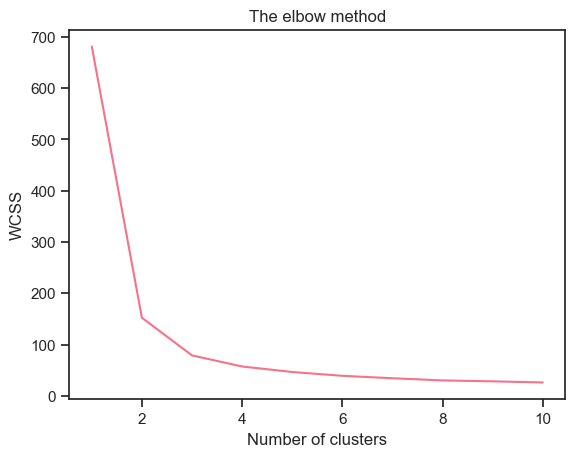

In [12]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

In [ ]:
#Visualise the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, alpha=.4, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, alpha=.4, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, alpha=.4, c = 'green', label = 'Iris-virginica')

#Plot clusters centroids 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

In [ ]:
# 3d scatterplot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, alpha=.4, c = 'blue', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, alpha=.4, c = 'orange', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, alpha=.4, c = 'green', label = 'Iris-virginica')

#Plot clusters centroids 
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')
plt.show()

#### Yellowbrick Package

In [ ]:
#!pip install yellowbrick  
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
# Instantiate the clustering model and visualizer
km = KMeans(random_state=42, n_init=10)
visualizer = KElbowVisualizer(km, k=(2,10))
 
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4, 5]:
    '''
    Create KMeans instances for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X) 